# End-to-End Exploratory Data Analysis of Olist E-Commerce Dataset

### ABOUT THIS PROJECT 

In [ ]:
This project presents an end-to-end Exploratory Data Analysis of the Olist public e-commerce dataset, involving data preprocessing, multi-table merging, feature engineering, and visualization.

The analysis highlights key KPIs such as revenue trends, top-performing product categories, payment behavior, customer segmentation indicators, and logistics performance, providing a data-driven view of the business ecosystem.

In [13]:
# importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [19]:
# importing the datsets
orders = pd.read_csv("olist_orders_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
category_translation = pd.read_csv("product_category_name_translation.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")



### DATA UNDERSTANDING 

In [26]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [28]:
orders.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


In [30]:
orders.shape

(99441, 8)

In [34]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [36]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [38]:
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [42]:
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [44]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### DATA CLEANING 

In [59]:
# convert date columns 
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])


In [61]:
# remove duplicate 
orders.drop_duplicates(inplace=True)
customers.drop_duplicates(inplace=True)


### MERGE DATASETS

In [72]:
df = orders.merge(customers, on='customer_id', how='left')

df = df.merge(order_items, on='order_id', how='left')

df = df.merge(payments, on='order_id', how='left')

df = df.merge(products, on='product_id', how='left')

df = df.merge(sellers, on='seller_id', how='left')

df = df.merge(reviews[['order_id','review_score']], on='order_id', how='left')


### FEATURE ENGINEERING 

In [75]:
#Extract Date Features
df['order_year'] = df['order_purchase_timestamp'].dt.year
df['order_month'] = df['order_purchase_timestamp'].dt.month
df['order_day'] = df['order_purchase_timestamp'].dt.day
df['order_weekday'] = df['order_purchase_timestamp'].dt.day_name()


In [79]:
#Delivery Time
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days


In [83]:
#Total Order Value
df['total_order_value'] = df['price'] + df['freight_value']


### BUSINESS KPIs

In [86]:
#total revenue 
total_revenue = df['price'].sum()
print("Total Revenue:", total_revenue)


Total Revenue: 14273699.65


In [88]:
#total orders 
total_orders = df['order_id'].nunique()
print("Total Orders:", total_orders)


Total Orders: 99441


In [90]:
#total customers 
total_customers = df['customer_unique_id'].nunique()
print("Total Customers:", total_customers)


Total Customers: 96096


In [100]:
# avg order value 
aov = total_revenue / total_orders
print("Average Order Value:", aov)




Average Order Value: 143.53938164338655


In [122]:
#Repeat Customer Rate
repeat = df.groupby('customer_unique_id')['order_id'].nunique()
repeat_rate = (repeat > 1).sum() / total_customers
print("Repeat Customer Rate:", repeat_rate)


Repeat Customer Rate: 0.031187562437562436


In [96]:
 # avg delivery days/time 
avg_delivery_days = df['delivery_time'].mean()

print("Average Delivery Time:", round(avg_delivery_days, 2), "days")


Average Delivery Time: 13.69 days


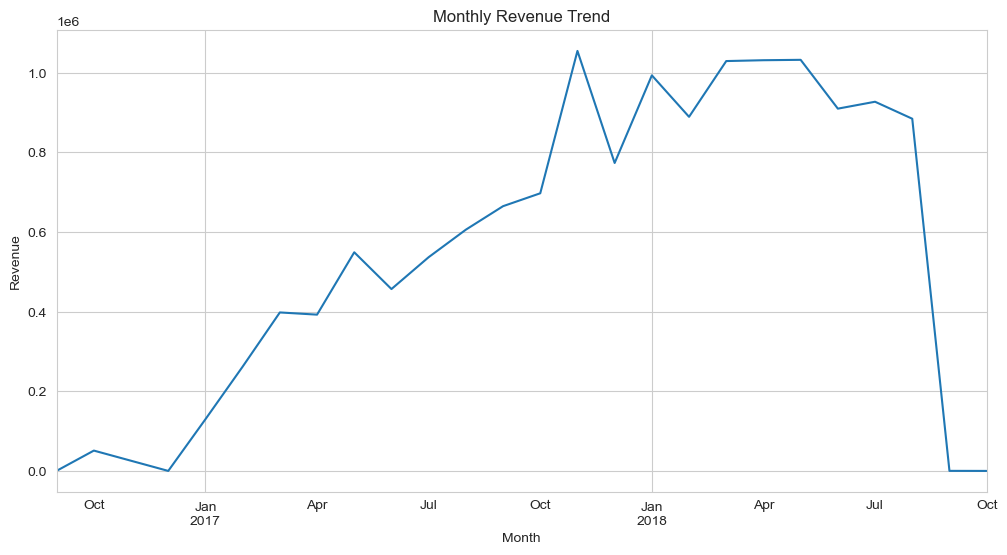

In [102]:
# monthly revenue trend 
monthly_revenue = df.groupby(df['order_purchase_timestamp'].dt.to_period('M'))['price'].sum()

monthly_revenue.plot(figsize=(12,6))
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


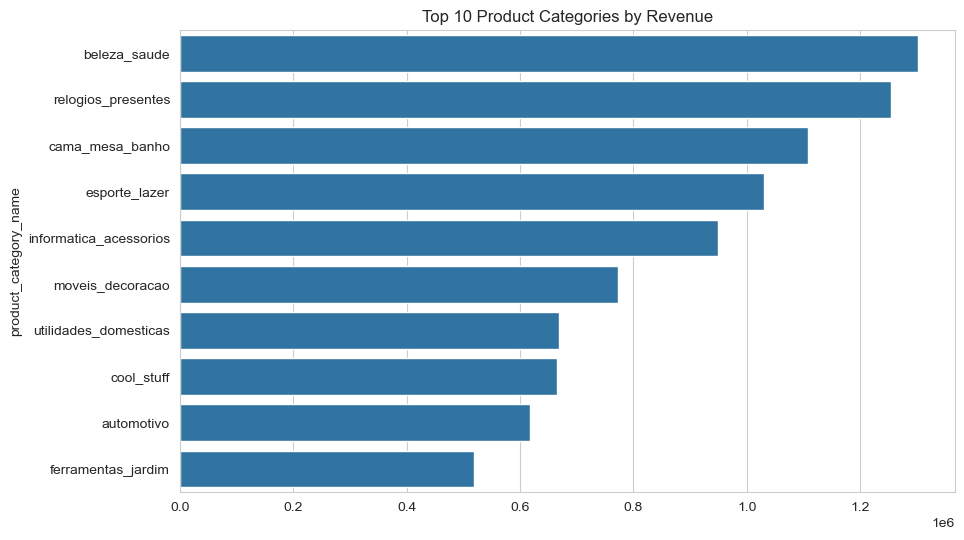

In [104]:
#Top 10 Product Categories
top_categories = df.groupby('product_category_name')['price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title("Top 10 Product Categories by Revenue")
plt.show()


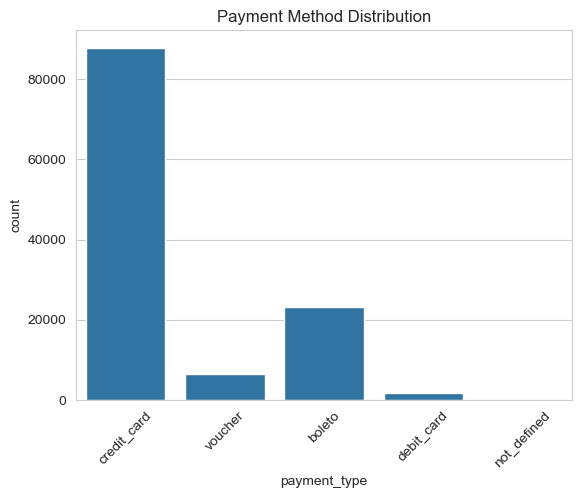

In [106]:
#Payment Method Distribution
sns.countplot(data=df, x='payment_type')
plt.title("Payment Method Distribution")
plt.xticks(rotation=45)
plt.show()


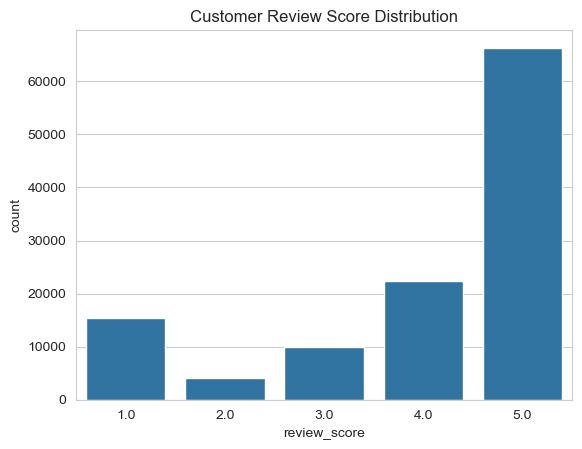

In [108]:
#Review Score Distribution
sns.countplot(data=df, x='review_score')
plt.title("Customer Review Score Distribution")
plt.show()


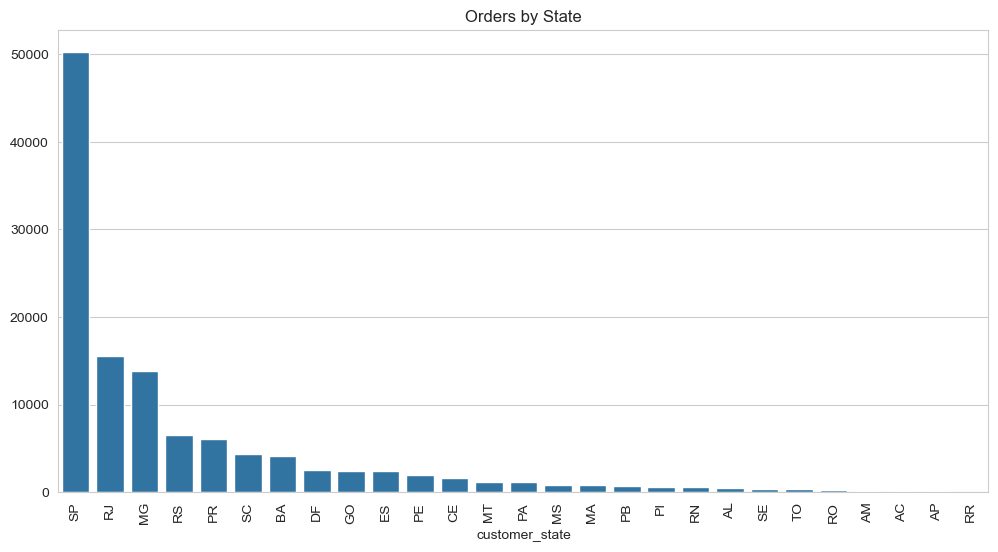

In [110]:
#Orders by State
state_orders = df['customer_state'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=state_orders.index, y=state_orders.values)
plt.xticks(rotation=90)
plt.title("Orders by State")
plt.show()


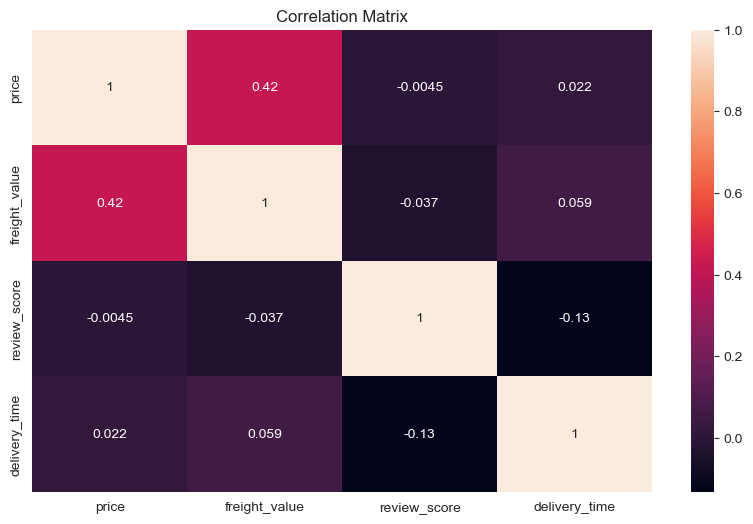

In [112]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[['price','freight_value','review_score','delivery_time']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


# BUSINESS INSIGHTS

### KEY INSIGHTS
1.The majority of revenue comes from top 5 product categories.

2.Credit card is the most preferred payment method.

3.States like SP generate the highest number of orders.

4.Average delivery time significantly impacts review scores.

5.A large portion of customers give 4–5 star ratings.

6.Revenue shows seasonal variation month-wise.

### BUSINESS RECOMMENDATIONS
1.Focus marketing campaigns on high-performing states.

2.Improve logistics in regions with higher delivery time.

3.Promote top categories using bundle offers.

4.Introduce loyalty programs to increase repeat purchases.

5.Optimize freight cost to improve profit margin.

6.Use targeted ads for low-performing categories.
